In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../input/delhiecmu/Dataset.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.set_index('Date',inplace=True)
df.head()

,dayofweek,tempmax,tempmin,temp,feelslike,cloudcover,dew,humidity,solarenergy,sunrise,sunset,Un-Restricted Demand,Max Demand Met (MW),Energy Met (MU)
Date,,,,,,,,,,,,,,
2023-01-01,6,20.1,7.9,13.4,13.3,24.0,9.6,79.8,12.5,2023-01-01T07:13:58,2023-01-01T17:35:09,4614,4614,73.7
2023-01-02,0,17.0,9.0,12.4,12.4,18.1,10.3,87.9,13.0,2023-01-02T07:14:14,2023-01-02T17:35:50,4635,4635,78.2
2023-01-03,1,15.3,7.9,11.2,11.0,22.9,8.7,85.6,13.1,2023-01-03T07:14:27,2023-01-03T17:36:33,4890,4890,81.4
2023-01-04,2,15.0,6.9,9.6,9.0,12.9,7.9,90.1,13.2,2023-01-04T07:14:39,2023-01-04T17:37:16,5163,5127,85.6
2023-01-05,3,17.0,5.8,9.7,9.4,25.0,6.1,83.0,13.4,2023-01-05T07:14:50,2023-01-05T17:38:00,5247,5247,85.6


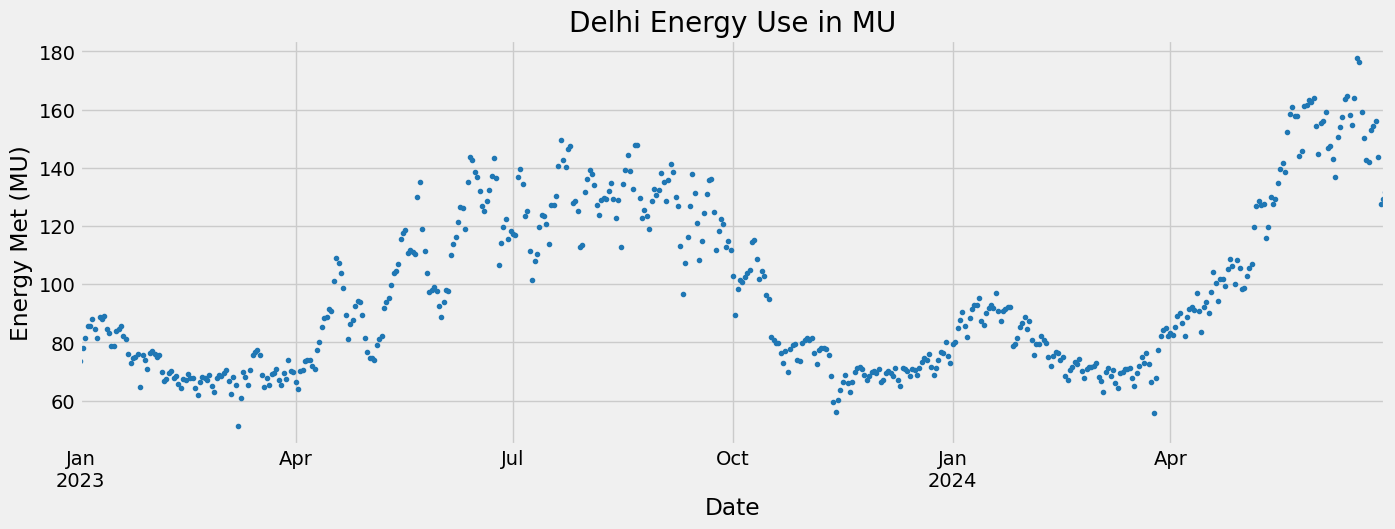

In [3]:
df['Energy Met (MU)'].plot(style='.',
                      figsize=(15,5),
                      color=color_pal[0],
                      title='Delhi Energy Use in MU')
plt.xlabel('Date')
plt.ylabel('Energy Met (MU)')
plt.show()

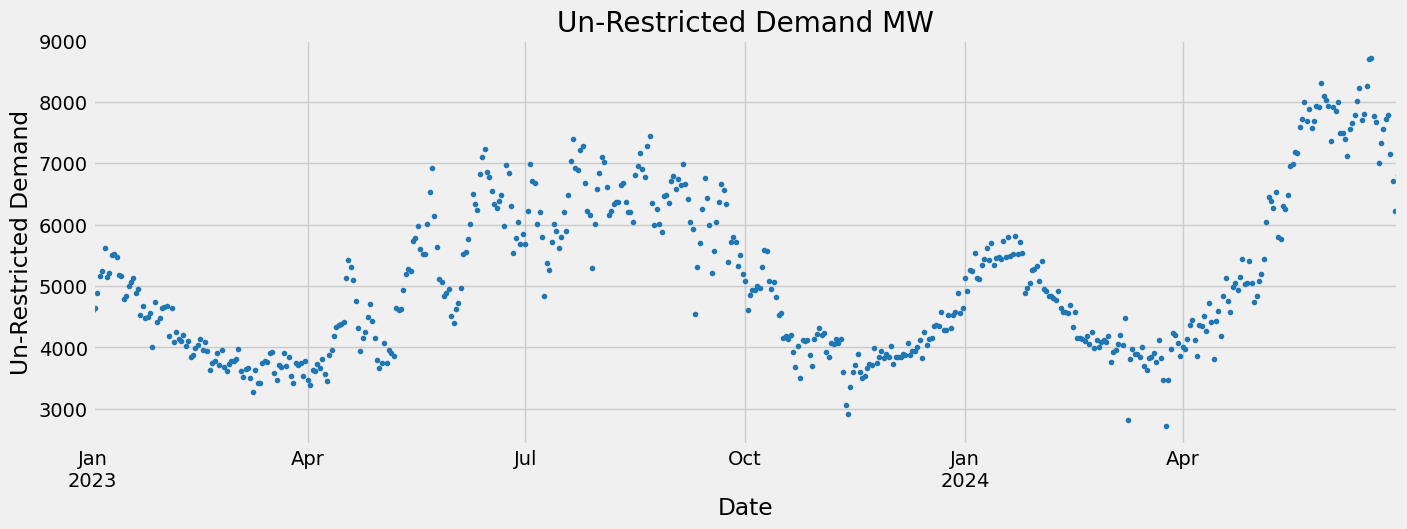

In [4]:
df['Un-Restricted Demand'].plot(style='.',
                      figsize=(15,5),
                      color=color_pal[0],
                      title='Un-Restricted Demand MW')
plt.xlabel('Date')
plt.ylabel('Un-Restricted Demand')
plt.show()

# Train/Test Split

<Axes: title={'center': 'Data Train/Test Split'}, xlabel='Date'>

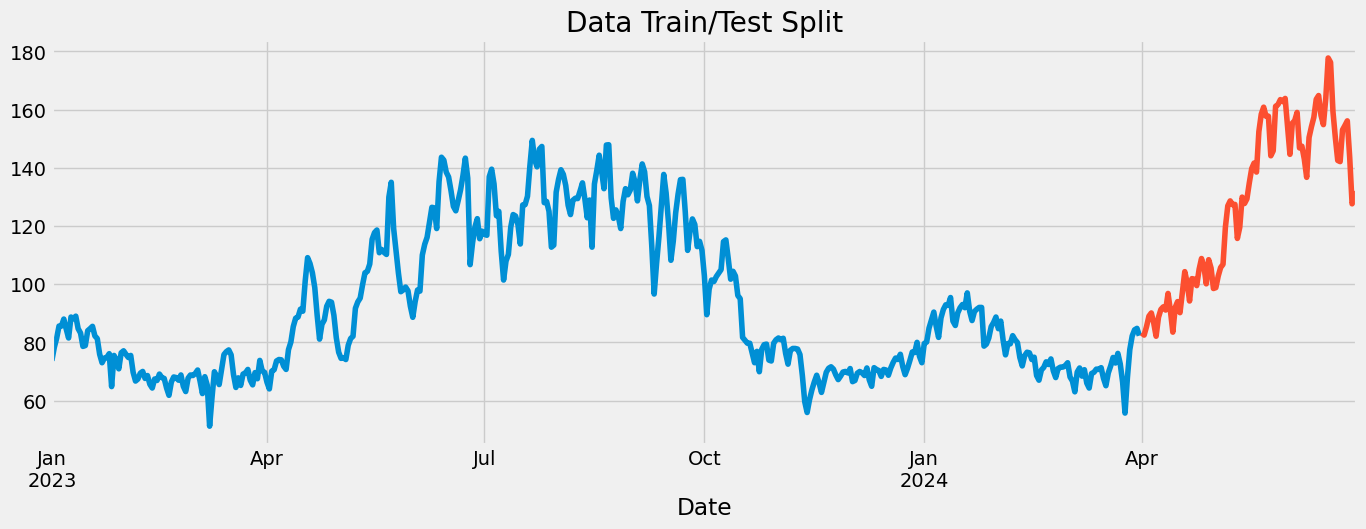

In [5]:
train = df.loc[df.index < '04-01-2024']
test = df.loc[df.index >= '04-01-2024']

fig, ax = plt.subplots(figsize=(15,5))
train['Energy Met (MU)'].plot(ax=ax, label='Train',title='Data Train/Test Split')
test['Energy Met (MU)'].plot(ax=ax, label='Test')
